In [5]:
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model


In [6]:
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "boston_housing.data"

## VariablesThere are 14 attributes in each case of the dataset. 

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's


df = pd.read_csv(path)

In [7]:
#Fetch the data value by the line
fd = pd.read_csv(path, header=None)
data = np.ones((len(fd), 14))
for i, d in enumerate(fd.values):
    d = list(map(float, filter(lambda s:s!='' ,d[0].split(' '))))
    data[i] = d



In [8]:
X, y = np.split(data, (13,), axis=1)
y = y.ravel() 


## Split data

In [9]:
from sklearn import datasets, linear_model

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

## Normalization

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [12]:
ss_x = StandardScaler()
ss_y = StandardScaler()

In [13]:
ss_X_train = ss_x.fit_transform(X_train)
ss_X_test = ss_x.transform(X_test)

In [14]:
ss_y_train = ss_y.fit_transform(y_train.reshape(-1,1))
ss_y_test = ss_y.transform(y_test.reshape(-1,1))

## LinearRegression fit

In [15]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(ss_X_train,ss_y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print (linreg.intercept_)
print (linreg.coef_)

[  2.45724496e-15]
[[-0.12026411  0.15044778  0.02951803  0.07470354 -0.28043353  0.22170939
   0.02190624 -0.35275513  0.29939558 -0.2028089  -0.23911894  0.06305081
  -0.45259462]]


In [17]:
y_pred = linreg.predict(X_test)

In [18]:
from sklearn.model_selection import cross_val_predict

In [19]:
predicted = cross_val_predict(linreg,X,y,cv=10)

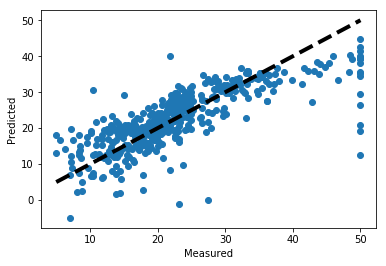

In [20]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection  import GridSearchCV

In [25]:
models = [
    Pipeline([
            ('ss', StandardScaler()),
            ('poly', PolynomialFeatures()),
            ('linear', RidgeCV(alphas=np.logspace(-3,1,20)))
        ]),
    Pipeline([
            ('ss', StandardScaler()),
            ('poly', PolynomialFeatures()),
            ('linear', LassoCV(alphas=np.logspace(-3,1,20)))
        ])
]


parameters = {
    "poly__degree": [3,2,1],
    "poly__interaction_only": [True, False],
    "poly__include_bias": [True, False],
    "linear__fit_intercept": [True, False]
}

In [28]:
from sklearn.linear_model.coordinate_descent import ConvergenceWarning

In [31]:
import warnings

In [32]:
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

Ridge算法:最优参数: {'linear__fit_intercept': True, 'poly__degree': 2, 'poly__include_bias': True, 'poly__interaction_only': True}
Ridge算法:R值=0.832


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when 

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when 

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when 

Lasso算法:最优参数: {'linear__fit_intercept': False, 'poly__degree': 2, 'poly__include_bias': False, 'poly__interaction_only': True}
Lasso算法:R值=0.828


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '\u7b97' [U+7b97]
  MathTextWarning)
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\mathtext.py:867: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '\u6cd5' [U+6cd5]
  MathTextWarning)
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '\u4f30' [U+4f30]
  MathTextWarning)
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '\u8ba1' [U+8ba1]
  MathTextWarning)
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '\u503c' [U+

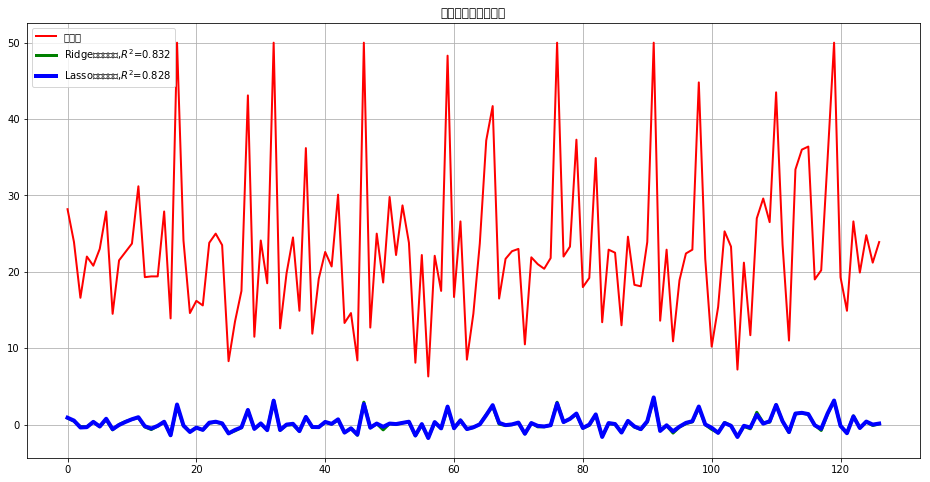

In [34]:
titles = ['Ridge', 'Lasso']
colors = ['g-', 'b-']
plt.figure(figsize=(16,8), facecolor='w')
ln_x_test = range(len(ss_X_test))

plt.plot(ln_x_test, y_test, 'r-', lw=2, label=u'真实值')
for t in range(2):
    
    model = GridSearchCV(models[t], param_grid=parameters, n_jobs=1)
    
    model.fit(ss_X_train, ss_y_train)
    
    
    print ("%s算法:最优参数:" % titles[t],model.best_params_)
    print ("%s算法:R值=%.3f" % (titles[t], model.best_score_))
    
    y_predict = model.predict(ss_X_test)
    
    plt.plot(ln_x_test, y_predict, colors[t], lw = t + 3, label=u'%s算法估计值,$R^2$=%.3f' % (titles[t],model.best_score_))

plt.legend(loc = 'upper left')
plt.grid(True)
plt.title(u"波士顿房屋价格预测")
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)
plt.show()
